In [1]:
# jupyter file options
import warnings
import pandas as pd

warnings.filterwarnings('default')
pd.options.display.float_format = '{:.6f}'.format
# TO ADD

## 1. Theory
> Todo

## 2. Imports

In [2]:
import numpy as np
import sklearn.discriminant_analysis as dis_an
import sklearn.model_selection as mdl_sl
from matplotlib import pyplot as plt
import scipy as sc
import sklearn.ensemble as ens
import sklearn.covariance as cov
import sklearn.neighbors as nei
import sklearn.svm as svm
import sklearn.preprocessing as prp
import pylab
from sklearn.pipeline import Pipeline
import sklearn.feature_selection as feat_sel
from IPython.display import Image
from IPython.core.display import HTML
import seaborn as sns
import sklearn.base as base
from mlxtend.evaluate import paired_ttest_5x2cv
import sklearn.tree as tree
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn.metrics as met

## 3. Read Data - Transform them into dataframes and arrays

### 3.1 Cross Validation Methods

##### 3.1.1 Explain why we don't use the traditioanl way of splitting the data to train, test by following a rule of thumb like 70%-30%
We will not split in the described way because we will use Repeated Stratified K-Fold validation to reduce bias in our algorithm.

##### 3.1.2 Explain Repeated Stratified K-Fold validation

> Todo

### 3.2 Produce data from csv files

In [3]:
data_path = 'data/train.csv'
data = pd.read_csv(data_path)

In [4]:
x = data[list(data.columns[:-1])]
x_array = np.array(x)
x.index = list(x.index)
y = data[['Lead']]
y_array = np.array(y)
y_array = y_array.ravel()
y.index = list(y.index)

## 4. Initial Model Test (Default parameters)
(create function for testing the model) - this function will be used in the whole jupyter notebook

In [5]:
def apply_qda(x_array, y_array, reg_param_input = 0.0, store_covariance_inp = False, tol_inp=0.0001):
    qda = dis_an.QuadraticDiscriminantAnalysis(reg_param = reg_param_input, 
                                              store_covariance = store_covariance_inp,
                                              tol = tol_inp)
    
    cv = mdl_sl.RepeatedStratifiedKFold(n_splits=5 , n_repeats=10, random_state=1)
    
    scores = mdl_sl.cross_val_score(qda, x_array, y_array, scoring='accuracy', cv=cv, n_jobs=-1)
    
    print("Accuracy: ", np.mean(scores), " Std. Deviation: ", np.std(scores))
       
    return np.mean(scores), np.std(scores)

In [6]:
qda1_initial = apply_qda(x_array, y_array)

Accuracy:  0.8420689334819769  Std. Deviation:  0.07213853789415832


#### 4.1 Plot initial results (Cannot plot the results)

## T-test

In [7]:
# check if difference between algorithms is real
def ttest(model1, model2, x_array, y_array):
    t, p = paired_ttest_5x2cv(estimator1=est_standard[1], estimator2=est_robust[1], X=x_array_new, y=y_array, scoring='accuracy', random_seed=1)
    # summarize
    print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
    # interpret the result
    if p <= 0.05:
        print('Difference between mean performance is probably real')
    else:
        print('Algorithms probably have the same performance')

## 5. Data Preparation
(theory)

### 5.1 Outlier Treatment

#### Boxplots (to see which variables are ouside of the min-max limits)

In [8]:
Image(url= "https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png")

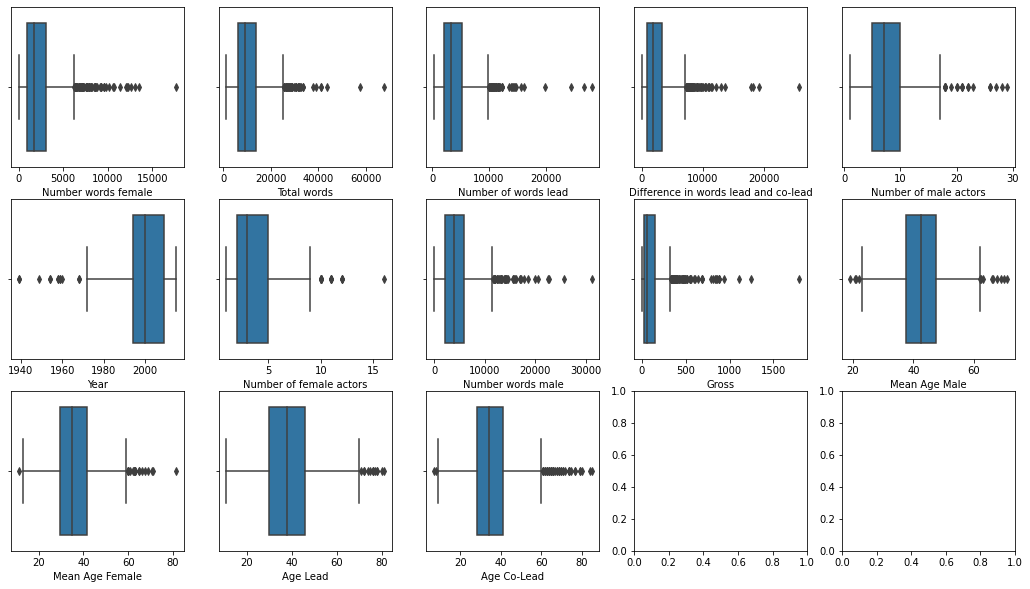

In [9]:
fig, axes = plt.subplots(3, 5, figsize=(18, 10))
i = 0
j = 0

for col in x.columns:
    sns.boxplot(ax=axes[i, j], x=x[col])
    j+=1
    if j > 4:
        i += 1
        j = 0

#### 5.1.1 Traditional Methods

##### 5.1.1.1 Z-Score

##### 5.1.1.2 IQR Score

#### 5.1.2 Modern Methods

##### 5.1.2.1 Isolation Forest

##### 5.1.2.2 Elleptic Envelope

##### 5.1.2.3 Local Outlier Factor

##### 5.1.2.4 One Class SVM

### 5.2 Standarization
(explain why standarization by sklearn.preprocessing must not be done in all data but only in training (using Pipeline etc))

### 5.3 Gaussian Distribution
(prove that box cox is the best way to transform every feature to gaussian distribution by plotting all features with all available methods)
(create box cox transformation function)

#### Plot of every feature to understand ditribution

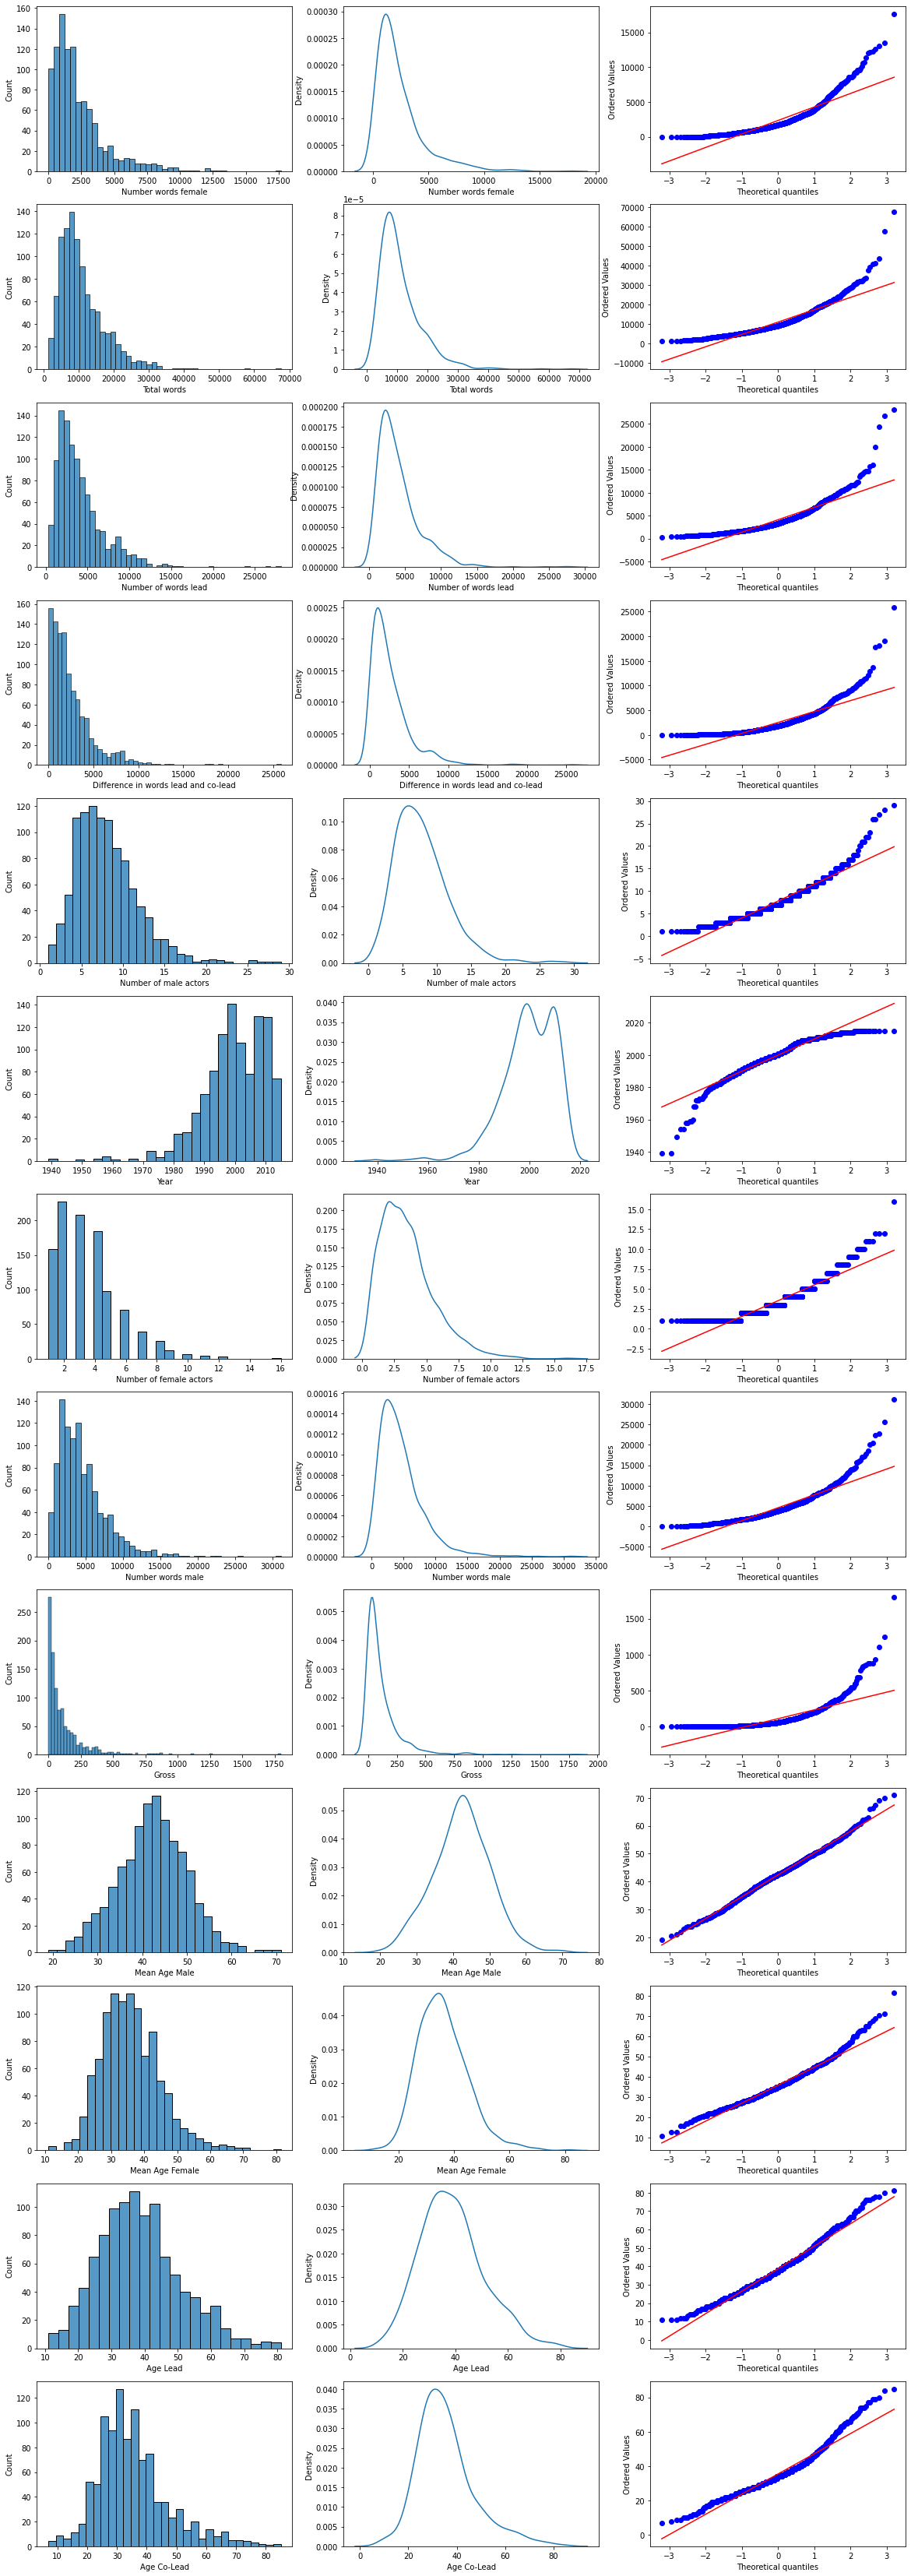

In [10]:
fig, axes = plt.subplots(13, 3, figsize=(20, 60))
i = 0

for col in x.columns:
    
    sns.histplot(ax = axes[i, 0], x=x[col])
    sns.kdeplot(ax = axes[i, 1], x=x[col])
    
    sc.stats.probplot(x= x[col],plot=axes[i, 2])
    axes[i, 2].set_title("")
    
    i += 1

In [11]:
#function to return distribution plots for each feature
def get_distribution_graphs(data,feature):
    fig, axes = plt.subplots(1, 3, figsize=(16, 2))
    sns.histplot(ax = axes[0], x=data[feature])
    sns.kdeplot(ax = axes[1], x=data[feature])
    sc.stats.probplot(x = data[feature], plot=axes[2])
    
def compare_gaussian_transformation_techniques(data, feature):
    data_log = pd.DataFrame(columns=[feature])
    data_inverse = pd.DataFrame(columns=[feature])
    data_square_root = pd.DataFrame(columns=[feature])
    data_exponential = pd.DataFrame(columns=[feature])
    data_box_cox = pd.DataFrame(columns=[feature])
    data_box_cox_transformed = pd.DataFrame(columns=[feature])
    
    data_log[feature] = np.log(data[feature])
    data_inverse[feature] = 1/data[feature]
    data_square_root[feature] = np.sqrt(data[feature])
    data_exponential[feature] = data[feature]**(1/1.2)
    
    get_distribution_graphs(data_log,feature)
    get_distribution_graphs(data_inverse,feature)
    get_distribution_graphs(data_square_root,feature)
    get_distribution_graphs(data_exponential,feature)
    
    try:
        data_box_cox[feature]=sc.stats.boxcox(data[feature])[0]
        get_distribution_graphs(data_box_cox,feature)
    except:
        print('Box Cox negative! Data transformation performed')
        data_box_cox_transformed = data[feature] +1
        data_box_cox[feature]=sc.stats.boxcox(data_box_cox_transformed)[0]
        get_distribution_graphs(data_box_cox,feature)

c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


Box Cox negative! Data transformation performed


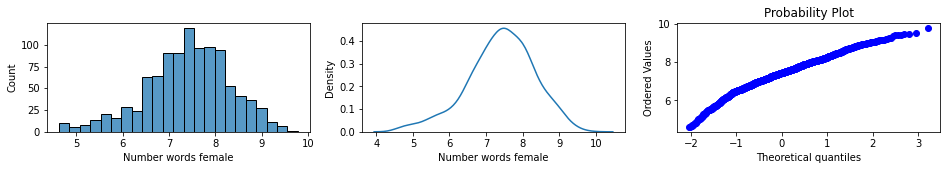

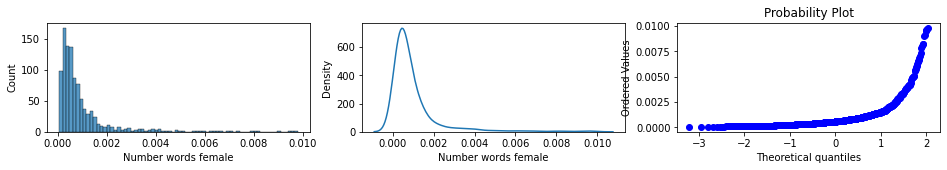

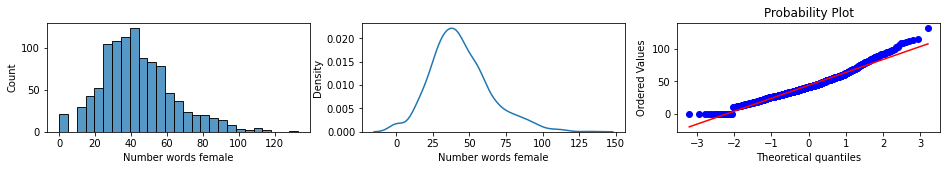

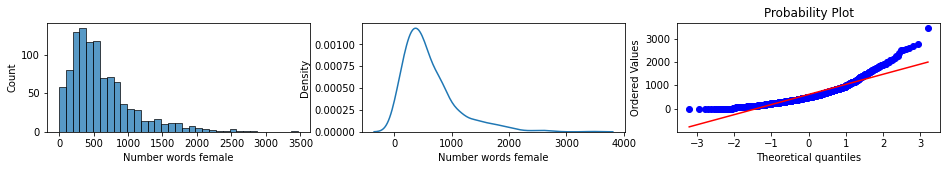

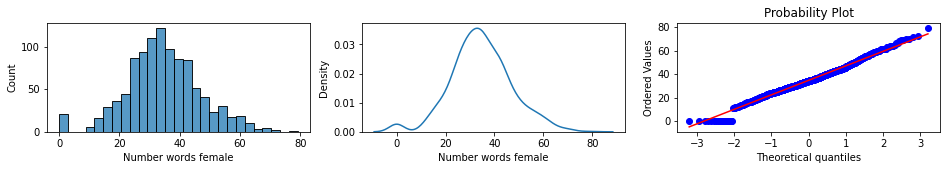

In [12]:
compare_gaussian_transformation_techniques(x, 'Number words female')

In [13]:
def transform_to_gaussian(x):
    x_temp = x.copy()
    for col in x.columns:
        if col == 'Year':
            x_temp[col] = np.log(x[col])
        else:
            x_temp[col] = sc.stats.boxcox(x[col])[0]

    return x_temp, np.array(x_temp)

## 6. Data Preparation: Application of methods

(application of data preparation techniques) - ALWAYS COUNT THE ACCURACY AFTER EACH STEP + PLOT BOXPLOT OF ACCURACY

### 6.1 Outlier Treatment
(that will be done while we apply the model because we want only the training dataset to be altered)


### 6.2 Gaussian Distribution

First, we need to create the "dirty" dataset because 0 values cannot be input to box cox. So for the features that have zero values, we add 1 as a constant in every value of the feature.

In [14]:
x_dirty = x.copy()
x_dirty['Number words female'] += 1
x_dirty['Number words male'] += 1
x_dirty['Gross'] += 1
x_new = x_dirty

In [15]:
x_new, x_array_new = transform_to_gaussian(x_new)

The accuracy increases to 89.64%

In [16]:
qda2_after_gaussian = apply_qda(x_array_new, y_array)

Accuracy:  0.9221339650687477  Std. Deviation:  0.01821088293614395


## 7. Hyper-Parameter Tuning
(don't forget to test accuracy in each step)

In [17]:
def get_accuracy_std_dev(results):
    return results.best_score_, results.cv_results_['std_test_score'][results.best_index_]

In [18]:
def apply_qda_check_scaler(x_array, y_array, grid_dict = {}, scaler = 'standard'):

    qda = dis_an.QuadraticDiscriminantAnalysis()

    if scaler == 'robust':
        sc = prp.RobustScaler()
    elif scaler == 'standard':
        sc = prp.StandardScaler()

    pipeline = Pipeline([
        ('preprocess',sc),
        ('model', qda)
    ])

    cv = mdl_sl.RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

    search = mdl_sl.GridSearchCV(pipeline, grid_dict, scoring='accuracy', cv=cv, n_jobs=-1, verbose = 3)

    results = search.fit(x_array, y_array)

    print(results.best_score_)

    print(results.best_params_)

    return results

In [19]:
grid_standard_scaler = {
    'preprocess__with_mean' : [True, False],
    'preprocess__with_std' : [True, False]
}

grid_robust_scaler = {
    'preprocess__with_centering' : [True, False],
    'preprocess__with_scaling' : [True, False],
    'preprocess__unit_variance' : [True, False]
}

In [20]:
apply_qda_check_scaler(x_array_new, y_array, grid_standard_scaler, scaler='standard')

Fitting 50 folds for each of 4 candidates, totalling 200 fits
0.9221339650687477
{'preprocess__with_mean': True, 'preprocess__with_std': True}


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=1),
             estimator=Pipeline(steps=[('preprocess', StandardScaler()),
                                       ('model',
                                        QuadraticDiscriminantAnalysis())]),
             n_jobs=-1,
             param_grid={'preprocess__with_mean': [True, False],
                         'preprocess__with_std': [True, False]},
             scoring='accuracy', verbose=3)

In [21]:
apply_qda_check_scaler(x_array_new, y_array, grid_robust_scaler, scaler='robust')

Fitting 50 folds for each of 8 candidates, totalling 400 fits
0.9221339650687477
{'preprocess__unit_variance': True, 'preprocess__with_centering': True, 'preprocess__with_scaling': True}


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=1),
             estimator=Pipeline(steps=[('preprocess', RobustScaler()),
                                       ('model',
                                        QuadraticDiscriminantAnalysis())]),
             n_jobs=-1,
             param_grid={'preprocess__unit_variance': [True, False],
                         'preprocess__with_centering': [True, False],
                         'preprocess__with_scaling': [True, False]},
             scoring='accuracy', verbose=3)

In [22]:
results = apply_qda_check_scaler(x_array_new, y_array, grid_standard_scaler, scaler='standard')
qda3_after_scaler = get_accuracy_std_dev(results)

Fitting 50 folds for each of 4 candidates, totalling 200 fits
0.9221339650687477
{'preprocess__with_mean': True, 'preprocess__with_std': True}


In [23]:
qda3_after_scaler

(0.9221339650687477, 0.01821088293614395)

In [24]:
def get_best_parameters_cv_and_scaling_included(x_array, y_array, grid_dict = {}):

    qda = dis_an.QuadraticDiscriminantAnalysis()
    
    sc = prp.StandardScaler(with_mean = True, with_std = True)

    pipeline = Pipeline([
        ('preprocess',sc),
        ('model', qda)
    ])

    cv = mdl_sl.RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

    search = mdl_sl.GridSearchCV(pipeline, grid_dict, scoring='accuracy', cv=cv, n_jobs=-1, verbose = 3)

    results = search.fit(x_array, y_array)

    print(results.best_score_)

    print(results.best_params_)

    return results

### 7.4 All in one

In [25]:
grid = {
    'model__reg_param' : [0.00001, 0.0001, 0.001,0.01, 0.1],
    'model__store_covariance' : [True, False],
    'model__tol' : [0.00001, 0.0001, 0.0002, 0.0005, 0.001]
}

In [26]:
results = get_best_parameters_cv_and_scaling_included(x_array_new, y_array, grid)

Fitting 50 folds for each of 50 candidates, totalling 2500 fits
0.9224224266072093
{'model__reg_param': 0.001, 'model__store_covariance': True, 'model__tol': 1e-05}


In [27]:
qda4_after_tuning = get_accuracy_std_dev(results)

In [28]:
qda4_after_tuning

(0.9224224266072093, 0.018712608732977188)

### 7.5 Best parameters

In [29]:
print(results.best_score_)

print(results.best_params_)

0.9224224266072093
{'model__reg_param': 0.001, 'model__store_covariance': True, 'model__tol': 1e-05}


## 8. Feature Selection
### 8.1 Supervised
#### 8.1.1 Filter Methods (ANOVA because numerical input - categorical output)
#### 8.1.2 Wrapper Methods (Recursive Feature Elimination - RFE)
#### 8.1.3 Intrinsic
##### 8.1.3.1 Trees
### 8.2 Unsupervised

?? BorutaPy

In [30]:
class WithoutOutliersClassifier(base.BaseEstimator, base.ClassifierMixin):
    def __init__(self, outlier_detector, classifier):
        self.outlier_detector = outlier_detector
        self.classifier = classifier

    def fit(self, X, y):
        self.outlier_detector_ = base.clone(self.outlier_detector)
        mask = self.outlier_detector_.fit_predict(X, y) == 1
        self.classifier_ = base.clone(self.classifier).fit(X[mask], y[mask])
        print(len(X))
        print(len(X[mask]))
        return self

    def predict(self, X):
        return self.classifier_.predict(X)
    
    def predict_proba(self, X):
        return self.classifier_.predict_proba(X) 
    
    def decision_function(self, X):
        return self.classifier_.decision_function(X)

In [31]:
def get_best_parameters_cv_scaling_outliers_included(x_array, y_array, grid, outlier_removal_method, random  = 1):

    qda = dis_an.QuadraticDiscriminantAnalysis()

    woc = WithoutOutliersClassifier(outlier_removal_method, qda)
    
    sc = prp.StandardScaler(with_mean = True, with_std = True)

    pipeline = Pipeline([
             ('preprocess',sc),
            ('model', woc)
        ])

    cv = mdl_sl.RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
    
    if random == 1:
        search = mdl_sl.RandomizedSearchCV(pipeline, grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose = 3, random_state = 1)
    else:
        search = mdl_sl.GridSearchCV(pipeline, grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose = 3)

    
    results = search.fit(x_array, y_array)

    print(results.best_score_)

    print(results.best_params_)
    
    return results

In [32]:
outliers = [ens.IsolationForest(), cov.EllipticEnvelope(), nei.LocalOutlierFactor(), svm.OneClassSVM()]
outliers_names = ['IsolationForest', 'EllipticEnvelope', 'LocalOutlierFactor', 'OneClassSVM']

grid_qda = {
    'model__classifier__reg_param' : [0.001],
    'model__classifier__store_covariance' : [True],
    'model__classifier__tol' : [0.00001]
}

grid_isolation_forest = {
    'model__outlier_detector__n_estimators': list(range(100, 800, 5)), 
    'model__outlier_detector__max_samples': list(range(100, 500, 5)), 
    'model__outlier_detector__contamination': [0.1, 0.2, 0.3, 0.4, 0.5], 
    'model__outlier_detector__max_features': [5,10,15], 
    'model__outlier_detector__bootstrap': [True, False], 
    'model__outlier_detector__n_jobs': [-1]
}

grid_elliptic_envelope = {
    'model__outlier_detector__store_precision': [True, False], 
    'model__outlier_detector__assume_centered': [True, False], 
    'model__outlier_detector__support_fraction': list(np.linspace(0,1,10)), 
    'model__outlier_detector__contamination': list(np.linspace(0.01,0.5,10)), 
    'model__outlier_detector__random_state': [1]
}

grid_local_outlier_factor = {
    'model__outlier_detector__n_neighbors': list(np.linspace(1,500,50, dtype='int32')), 
    'model__outlier_detector__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'model__outlier_detector__leaf_size': list(np.linspace(10,100,10, dtype='int32')), 
    'model__outlier_detector__metric': ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan'],
#     'model__outlier_detector__p': [1],
    'model__outlier_detector__contamination': list(np.linspace(0.01,0.5,10)),
    'model__outlier_detector__novelty': [True, False], 
    'model__outlier_detector__n_jobs': [-1]
}

grid_local_one_class_svm= {
}

outliers_grid = [grid_isolation_forest, grid_elliptic_envelope, grid_local_outlier_factor, grid_local_one_class_svm]

results_iter_1 = []

for outlier_index in range(0, len(outliers)):
    
    grid_qda_with_outlier = {**grid_qda, **outliers_grid[outlier_index]}
        
    print(outliers[outlier_index])
        
    results = get_best_parameters_cv_scaling_outliers_included(x_array_new, 
                                                         y_array, 
                                                         grid_qda_with_outlier, 
                                                         outliers[outlier_index])
    
    results_iter_1.append(results)
    
    print()    

IsolationForest()
Fitting 50 folds for each of 10 candidates, totalling 500 fits


c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\vagma\AppData\Local\Temp/ipykernel_4744/2234322256.py", line 8, in fit
  File "c:\users\vagma\

1039
935
0.9247333704942399
{'model__outlier_detector__n_jobs': -1, 'model__outlier_detector__n_estimators': 200, 'model__outlier_detector__max_samples': 465, 'model__outlier_detector__max_features': 10, 'model__outlier_detector__contamination': 0.1, 'model__outlier_detector__bootstrap': True, 'model__classifier__tol': 1e-05, 'model__classifier__store_covariance': True, 'model__classifier__reg_param': 0.001}

EllipticEnvelope()
Fitting 50 folds for each of 10 candidates, totalling 500 fits
1039
972
0.9285813823857303
{'model__outlier_detector__support_fraction': 1.0, 'model__outlier_detector__store_precision': True, 'model__outlier_detector__random_state': 1, 'model__outlier_detector__contamination': 0.06444444444444444, 'model__outlier_detector__assume_centered': True, 'model__classifier__tol': 1e-05, 'model__classifier__store_covariance': True, 'model__classifier__reg_param': 0.001}

LocalOutlierFactor()
Fitting 50 folds for each of 10 candidates, totalling 500 fits


c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\vagma\AppData\Local\Temp/ipykernel_4744/2234322256.py", line 8, in fit
  File "c:\users\vagma\

1039
972
0.9258881456707545
{'model__outlier_detector__novelty': False, 'model__outlier_detector__n_neighbors': 184, 'model__outlier_detector__n_jobs': -1, 'model__outlier_detector__metric': 'euclidean', 'model__outlier_detector__leaf_size': 40, 'model__outlier_detector__contamination': 0.06444444444444444, 'model__outlier_detector__algorithm': 'kd_tree', 'model__classifier__tol': 1e-05, 'model__classifier__store_covariance': True, 'model__classifier__reg_param': 0.001}

OneClassSVM()
Fitting 50 folds for each of 1 candidates, totalling 50 fits
1039
518
0.9065454292084728
{'model__classifier__tol': 1e-05, 'model__classifier__store_covariance': True, 'model__classifier__reg_param': 0.001}



In [33]:
grid_isolation_forest = {
    'model__outlier_detector__n_estimators': list(range(150, 250, 5)), 
    'model__outlier_detector__max_samples': list(range(400, 600, 5)), 
    'model__outlier_detector__contamination': [0.05, 0.1, 0.2], 
    'model__outlier_detector__max_features': list(range(5, 20, 4)), 
    'model__outlier_detector__bootstrap': [True], 
    'model__outlier_detector__n_jobs': [-1]
}

grid_elliptic_envelope = {
    'model__outlier_detector__store_precision': [True], 
    'model__outlier_detector__assume_centered': [True], 
    'model__outlier_detector__support_fraction': list(np.linspace(0.5,2,10)), 
    'model__outlier_detector__contamination': list(np.linspace(0.005,0.1,10)), 
    'model__outlier_detector__random_state': [1]
}

grid_local_outlier_factor = {
    'model__outlier_detector__n_neighbors': list(np.linspace(150,250,20, dtype='int32')), 
    'model__outlier_detector__algorithm': ['kd_tree'], 
    'model__outlier_detector__leaf_size': list(np.linspace(30,50,10, dtype='int32')), 
    'model__outlier_detector__metric': ['euclidean'],
#     'model__outlier_detector__p': [1],
    'model__outlier_detector__contamination': list(np.linspace(0.01,0.5,10)),
    'model__outlier_detector__novelty': [False], 
    'model__outlier_detector__n_jobs': [-1]
}

grid_local_one_class_svm= {}

outliers_grid = [grid_isolation_forest, grid_elliptic_envelope, grid_local_outlier_factor, grid_local_one_class_svm]

results_iter_2 = []

for outlier_index in range(0, len(outliers)):
    
    grid_qda_with_outlier = {**grid_qda, **outliers_grid[outlier_index]}
        
    print(outliers[outlier_index])
        
    results = get_best_parameters_cv_scaling_outliers_included(x_array_new, 
                                                         y_array, 
                                                         grid_qda_with_outlier, 
                                                         outliers[outlier_index])
    
    results_iter_2.append(results)
    
    print()
    

IsolationForest()
Fitting 50 folds for each of 10 candidates, totalling 500 fits


c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\vagma\AppData\Local\Temp/ipykernel_4744/2234322256.py", line 8, in fit
  File "c:\users\vagma\py

1039
987
0.9247356930509105
{'model__outlier_detector__n_jobs': -1, 'model__outlier_detector__n_estimators': 225, 'model__outlier_detector__max_samples': 455, 'model__outlier_detector__max_features': 5, 'model__outlier_detector__contamination': 0.05, 'model__outlier_detector__bootstrap': True, 'model__classifier__tol': 1e-05, 'model__classifier__store_covariance': True, 'model__classifier__reg_param': 0.001}

EllipticEnvelope()
Fitting 50 folds for each of 10 candidates, totalling 500 fits
1039
946
0.9338735600148642
{'model__outlier_detector__support_fraction': 0.6666666666666666, 'model__outlier_detector__store_precision': True, 'model__outlier_detector__random_state': 1, 'model__outlier_detector__contamination': 0.08944444444444445, 'model__outlier_detector__assume_centered': True, 'model__classifier__tol': 1e-05, 'model__classifier__store_covariance': True, 'model__classifier__reg_param': 0.001}

LocalOutlierFactor()
Fitting 50 folds for each of 10 candidates, totalling 500 fits
10

c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


1039
518
0.9065454292084728
{'model__classifier__tol': 1e-05, 'model__classifier__store_covariance': True, 'model__classifier__reg_param': 0.001}



In [34]:
grid_isolation_forest = {
    'model__outlier_detector__n_estimators': list(range(150, 200, 5)), 
    'model__outlier_detector__max_samples': list(range(400, 480, 5)), 
    'model__outlier_detector__contamination': [0.1], 
    'model__outlier_detector__max_features': list(range(7, 11, 2)), 
    'model__outlier_detector__bootstrap': [True], 
    'model__outlier_detector__n_jobs': [-1]
}

grid_elliptic_envelope = {
    'model__outlier_detector__store_precision': [True], 
    'model__outlier_detector__assume_centered': [True], 
    'model__outlier_detector__support_fraction': list(np.linspace(1.2,1.9,10)), 
    'model__outlier_detector__contamination': list(np.linspace(0.01,0.03,5)), 
    'model__outlier_detector__random_state': [1]
}

grid_local_outlier_factor = {
    'model__outlier_detector__n_neighbors': list(np.linspace(200,250,10, dtype='int32')), 
    'model__outlier_detector__algorithm': ['kd_tree'], 
    'model__outlier_detector__leaf_size': list(np.linspace(25,40,5, dtype='int32')), 
    'model__outlier_detector__metric': ['euclidean'],
#     'model__outlier_detector__p': [1],
    'model__outlier_detector__contamination': list(np.linspace(0.01,0.1,10)),
    'model__outlier_detector__novelty': [False], 
    'model__outlier_detector__n_jobs': [-1]
}

grid_local_one_class_svm= {
    
     'model__outlier_detector__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'model__outlier_detector__tol' : [0.00001, 0.0001, 0.0002, 0.0005, 0.001],
    'model__outlier_detector__nu' : list(np.linspace(0.01,1,50))
    
    
    
}

outliers_grid = [grid_isolation_forest, grid_elliptic_envelope, grid_local_outlier_factor, grid_local_one_class_svm]

results_iter_3 = []

for outlier_index in range(0, len(outliers)):
    
    grid_qda_with_outlier = {**grid_qda, **outliers_grid[outlier_index]}
        
    print(outliers[outlier_index])
        
    results = get_best_parameters_cv_scaling_outliers_included(x_array_new, 
                                                         y_array, 
                                                         grid_qda_with_outlier, 
                                                         outliers[outlier_index])
    
    results_iter_3.append(results)
    
    print()
    

IsolationForest()
Fitting 50 folds for each of 10 candidates, totalling 500 fits
1039
935
0.9257924563359348
{'model__outlier_detector__n_jobs': -1, 'model__outlier_detector__n_estimators': 165, 'model__outlier_detector__max_samples': 460, 'model__outlier_detector__max_features': 7, 'model__outlier_detector__contamination': 0.1, 'model__outlier_detector__bootstrap': True, 'model__classifier__tol': 1e-05, 'model__classifier__store_covariance': True, 'model__classifier__reg_param': 0.001}

EllipticEnvelope()
Fitting 50 folds for each of 10 candidates, totalling 500 fits
1039
1007
0.9297389446302489
{'model__outlier_detector__support_fraction': 1.2, 'model__outlier_detector__store_precision': True, 'model__outlier_detector__random_state': 1, 'model__outlier_detector__contamination': 0.03, 'model__outlier_detector__assume_centered': True, 'model__classifier__tol': 1e-05, 'model__classifier__store_covariance': True, 'model__classifier__reg_param': 0.001}

LocalOutlierFactor()
Fitting 50 fol

c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\vagma\AppData\Local\Temp/ipykernel_4744/2234322256.py", line 9, in fit
  File "c:\users\vagma\py

In [35]:
for i in range(0,4):
    print(outliers[i], " ", get_accuracy_std_dev(results_iter_3[i]))

IsolationForest()   (0.9257924563359348, 0.01673375943743511)
EllipticEnvelope()   (0.9297389446302489, 0.016758698827608776)
LocalOutlierFactor()   (0.9256949089557784, 0.016852677361150422)
OneClassSVM()   (0.9179951690821256, 0.01837966105995933)


{'model__outlier_detector__support_fraction': 1.2, 'model__outlier_detector__store_precision': True, 'model__outlier_detector__random_state': 1, 'model__outlier_detector__contamination': 0.03, 'model__outlier_detector__assume_centered': True, 'model__classifier__tol': 1e-05, 'model__classifier__store_covariance': True, 'model__classifier__reg_param': 0.001}

## 9. Feature Selection: Application of methods
(application of data preparation techniques) - ALWAYS COUNT THE ACCURACY AFTER EACH STEP + PLOT BOXPLOT OF ACCURACY


In [36]:
def get_best_parameters_feature_selection_cv_scaling_outliers_included(x_array, y_array, grid, feature_selection_method):

    qda = dis_an.QuadraticDiscriminantAnalysis(reg_param = 0.001,
                                            store_covariance = True, 
                                            tol = 0.00001)
    
    
    elen = cov.EllipticEnvelope(support_fraction = 1.2,
                               store_precision = True,
                               contamination = 0.03,
                               assume_centered = True,
                                random_state = 1)

    woc = WithoutOutliersClassifier(elen, qda)

    sc = prp.StandardScaler(with_mean = True, with_std = True)

    pipeline = Pipeline([
                 ('preprocess',sc),
                 ('selector', feature_selection_method),
                ('model', woc)
            ])

    cv = mdl_sl.RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

    search = mdl_sl.GridSearchCV(pipeline, grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose = 3)

    results = search.fit(x_array, y_array)

    print(results.best_score_)

    print(results.best_params_)

    return results

### 9.1 Select KBest - Anova

In [37]:
sel = feat_sel.SelectKBest(score_func=feat_sel.f_classif)

grid = {
    'selector__k' : list(range(1,len(x_new.columns)+1))
}

In [38]:
results_anova = get_best_parameters_feature_selection_cv_scaling_outliers_included(x_array_new, 
                                                                                   y_array, 
                                                                                   grid, 
                                                                                   sel)

Fitting 50 folds for each of 13 candidates, totalling 650 fits
1039
1007
0.9297389446302489
{'selector__k': 13}


In [39]:
get_accuracy_std_dev(results_anova)

(0.9297389446302489, 0.016758698827608776)

### 9.2 Wrapper Methods (RFE)

In [40]:
sel = feat_sel.RFE(estimator=tree.DecisionTreeClassifier(), step=1)

grid = {
    'selector__n_features_to_select' : list(range(1,len(x_new.columns)+1))
}

results_rfe = get_best_parameters_feature_selection_cv_scaling_outliers_included(x_array_new, 
                                                                                   y_array, 
                                                                                   grid, 
                                                                                   sel)

Fitting 50 folds for each of 13 candidates, totalling 650 fits
1039
1007
0.9297389446302489
{'selector__n_features_to_select': 13}


In [41]:
get_accuracy_std_dev(results_rfe)

(0.9297389446302489, 0.016758698827608776)

### 9.3 Select from Model

grid = {
    'selector__max_features' : list(range(1,len(x_new.columns)+1))
}

sel = feat_sel.SelectFromModel(tree.DecisionTreeClassifier())

results_sfm = get_best_parameters_feature_selection_cv_scaling_outliers_included(x_array_new, 
                                                                                   y_array, 
                                                                                   grid, 
                                                                                   sel)

### 9.4 SequentialFeatureSelector

In [42]:
grid = {
    'selector__n_features_to_select' : list(range(1,len(x_new.columns)+1))
}

sel = feat_sel.SequentialFeatureSelector(tree.DecisionTreeClassifier())

results_sfs = get_best_parameters_feature_selection_cv_scaling_outliers_included(x_array_new, 
                                                                                   y_array, 
                                                                                   grid, 
                                                                                   sel)

Fitting 50 folds for each of 13 candidates, totalling 650 fits


c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 650.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\users\vagma\pycharmprojects\sml\venv\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transform

1039
1007
0.9166439056112968
{'selector__n_features_to_select': 12}


In [43]:
get_accuracy_std_dev(results_sfs)

(0.9166439056112968, 0.031888456276653376)

No feature selection because LDA does it already. We don't see any significant rise of the performance

## Final Model

In [44]:
def final_model(x_array, y_array):

    qda = dis_an.QuadraticDiscriminantAnalysis(reg_param = 0.001,
                                            store_covariance = True, 
                                            tol = 0.00001)
    
    elen = cov.EllipticEnvelope(support_fraction = 1.2,
                               store_precision = True,
                               contamination = 0.03,
                               assume_centered = True,
                                random_state = 1)

    woc = WithoutOutliersClassifier(elen, qda)

    sc = prp.StandardScaler(with_mean = True, with_std = True)

    pipeline = Pipeline([
                 ('preprocess',sc),
                ('model', woc)
            ])

    cv = mdl_sl.RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

    scores = mdl_sl.cross_val_score(pipeline, x_array, y_array, scoring='accuracy', cv=cv, n_jobs=-1)
    
    print("Accuracy: ", np.mean(scores), " Std. Deviation: ", np.std(scores))
       
    return np.mean(scores), np.std(scores)

## 10. Feature Creation - Deletion

### 10.1 Feature Creation

In [45]:
x_with_new_features = x.copy()
x_with_new_features['words per female actor']=x_with_new_features['Number words female']/x_with_new_features['Number of female actors']
x_with_new_features['words per male actor']=x_with_new_features['Number words male']/x_with_new_features['Number of male actors']
x_with_new_features['female words vs total words']=x_with_new_features['Number words female']/x_with_new_features['Total words']
x_with_new_features['male words vs total words']=x_with_new_features['Number words male']/x_with_new_features['Total words']
x_with_new_features['number of words co-lead']=x_with_new_features['Number of words lead']-x_with_new_features['Difference in words lead and co-lead']
x_with_new_features['female vs male ratio']=x_with_new_features['Number of female actors']/x_with_new_features['Number of male actors']

In [46]:
x_with_new_features.describe()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,words per female actor,words per male actor,female words vs total words,male words vs total words,number of words co-lead,female vs male ratio
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044,712.690791,592.343408,0.212103,0.414740,1583.232916,0.607035
std,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696,676.385513,365.433714,0.130209,0.164768,1370.656879,0.674576
min,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000,0.000000,0.000000,0.000000,0.000000,102.000000,0.055556
25%,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000,337.150000,353.000000,0.114363,0.290260,672.000000,0.250000
50%,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000,534.000000,508.111111,0.189578,0.419150,1177.000000,0.428571
75%,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000,869.000000,744.150000,0.290060,0.540080,2041.500000,0.750000
max,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000,7164.000000,3292.000000,0.686816,0.817869,10316.000000,9.000000


In [47]:
# add 1 to zero columns
x_with_new_features['Number words female'] += 1
x_with_new_features['Number words male'] += 1
x_with_new_features['Gross'] += 1
x_with_new_features['words per female actor'] += 1
x_with_new_features['words per male actor'] += 1
x_with_new_features['female words vs total words'] += 1
x_with_new_features['male words vs total words'] += 1

In [48]:
x_with_new_features_new, x_array_with_new_features_new = transform_to_gaussian(x_with_new_features)

In [49]:
qda5_after_feature_addition_accuracy, qda5_after_feature_addition = final_model(x_array_with_new_features_new, y_array)

Accuracy:  0.9430314009661835  Std. Deviation:  0.01593862082421036


## 11. Other operations
### 11.1 Collinearity

In [50]:
def check_collinearity(x):
    vif_data = pd.DataFrame()
    vif_data["feature"] = x.columns
    vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
    return vif_data.sort_values(['VIF'], ascending = False)

In [51]:
x_col_test_with_new_features = x_with_new_features_new.copy()
x_col_test_with_new_features_array = np.array(x_col_test_with_new_features)

for element_to_remove in list(check_collinearity(x_col_test_with_new_features)['feature']):
    
    x_col_test_with_new_features.drop(element_to_remove, axis=1, inplace=True)
    x_col_test_with_new_features_array = np.array(x_col_test_with_new_features)
    print('Removed: ', element_to_remove)
    print(final_model(x_col_test_with_new_features_array, y_array))
    print(check_collinearity(x_col_test_with_new_features))
    print()
    
    if element_to_remove == 'Number of female actors':
        break

Removed:  Number of words lead
Accuracy:  0.9430304719435153  Std. Deviation:  0.013859222967988345
(0.9430304719435153, 0.013859222967988345)
                                 feature         VIF
1                            Total words 2616.867053
4                                   Year 1921.414543
6                      Number words male  787.032977
3                  Number of male actors  644.701615
0                    Number words female  493.725514
13                  words per male actor  392.239557
5                Number of female actors  298.278352
17                  female vs male ratio  212.809957
12                words per female actor  204.794232
16               number of words co-lead  170.787771
9                        Mean Age Female  158.207834
14           female words vs total words  113.418177
15             male words vs total words   94.063561
2   Difference in words lead and co-lead   79.812907
11                           Age Co-Lead   76.081177
8        

In [52]:
x_col_test = x_new.copy()
x_col_test_array = np.array(x_col_test)

for element_to_remove in list(check_collinearity(x_col_test)['feature']):
    
    x_col_test.drop(element_to_remove, axis=1, inplace=True)
    x_col_test_array = np.array(x_col_test)
    print('Removed: ', element_to_remove)
    print(final_model(x_col_test_array, y_array))
    print(check_collinearity(x_col_test))
    print()
    
    if element_to_remove == 'Mean Age Female':
        break

Removed:  Total words
Accuracy:  0.9278121516164994  Std. Deviation:  0.017751908011089435
(0.9278121516164994, 0.017751908011089435)
                                 feature        VIF
1                   Number of words lead 577.544785
4                                   Year 354.782483
9                        Mean Age Female 157.695393
11                           Age Co-Lead  75.567790
8                          Mean Age Male  46.924612
10                              Age Lead  46.023890
2   Difference in words lead and co-lead  42.370745
6                      Number words male  40.003916
0                    Number words female  23.563737
3                  Number of male actors  19.992911
5                Number of female actors   6.674330
7                                  Gross   6.637713

Removed:  Number of words lead
Accuracy:  0.8958588814567076  Std. Deviation:  0.0195898182961723
(0.8958588814567076, 0.0195898182961723)
                                 feature        VI

To reduce collinearity we remove these columns:
* 

## 13. Evaluation

In [53]:
def produce_evaluation(x_array, y_array):

    qda = dis_an.QuadraticDiscriminantAnalysis(reg_param = 0.001,
                                            store_covariance = True, 
                                            tol = 0.00001)
    
    elen = cov.EllipticEnvelope(support_fraction = 1.2,
                               store_precision = True,
                               contamination = 0.03,
                               assume_centered = True,
                                random_state = 1)

    woc = WithoutOutliersClassifier(elen, qda)

    sc = prp.StandardScaler(with_mean = True, with_std = True)

    pipeline = Pipeline([
                 ('preprocess',sc),
                ('model', woc)
            ])

    metrics = {
               'accuracy': 'accuracy',
                'f1': met.make_scorer(met.f1_score, pos_label='Male'),
               'roc_auc':  'roc_auc',
               'precision':met.make_scorer(met.precision_score, pos_label='Male'),
               'recall': met.make_scorer(met.recall_score, pos_label='Male')}

    cv = mdl_sl.RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

    result = mdl_sl.cross_validate(pipeline, x_array, y_array, scoring=metrics, cv=cv, n_jobs=-1)

    labels = []
    avg = []
    std = []

    for m in metrics:
        values = result["test_" + m]
        labels.append(m)
        avg.append(np.mean(values))
        std.append(np.std(values))

    return pd.DataFrame({"Metric":labels, "Average":avg, "Std dev":std})

Without collinearity check

In [54]:
produce_evaluation(x_array_new, y_array)

,Metric,Average,Std dev
0,accuracy,0.929739,0.016759
1,f1,0.954417,0.010647
2,roc_auc,0.967932,0.013556
3,precision,0.937340,0.017343
4,recall,0.972357,0.011222


After removing features from the initial dataset

In [55]:
produce_evaluation(x_col_test_array, y_array)

,Metric,Average,Std dev
0,accuracy,0.894994,0.014965
1,f1,0.932196,0.009484
2,roc_auc,0.930791,0.020578
3,precision,0.910737,0.017381
4,recall,0.955159,0.017089


After removing features from the enhanced dataset

In [56]:
produce_evaluation(x_col_test_with_new_features_array, y_array)

,Metric,Average,Std dev
0,accuracy,0.946198,0.015665
1,f1,0.964594,0.010161
2,roc_auc,0.985009,0.007539
3,precision,0.960147,0.015763
4,recall,0.969299,0.012719


## 14. Useful Links
### General Links
* [LDA - Scikit](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)
* [QDA - Scikit](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html)